In [1]:
import numpy as np
#from matplotlib import rcParams
import matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit 
import sys
import csv

matplotlib.rc('font', **{'family':'serif', 'serif':['Computer Modern']})
matplotlib.rc('text', usetex=True)

#plt.rcParams["font.family"] = "serif"
plt.rc('axes', linewidth=1.25)
plt.rc('xtick.major', size=5, width=1.25)
plt.rc('xtick.minor', size=5, width=1.25)
plt.rc('ytick.major', size=5, width=1.25)
plt.rc('ytick.minor', size=5, width=1.25)
ticklabelsize=11
legendlabelsize=11
axislabelsize=20

tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.) 

In [2]:
cyclic00=np.loadtxt("/uni-mainz.de/homes/asourpis/Documents/gromer/PhD_roadmap/MD&electricfield/hbonds/cyclic_analysis/data_100ns/cycle_1stclass_zero.dat")
#cyclic03=np.loadtxt("/uni-mainz.de/homes/asourpis/Documents/gromer/PhD_roadmap/MD&electricfield/hbonds/cyclic_analysis/cyclic_analysis_0.3.dat")
cyclic1e1=np.loadtxt("/uni-mainz.de/homes/asourpis/Documents/gromer/PhD_roadmap/MD&electricfield/hbonds/cyclic_analysis/data_100ns/cycle_1stclass_1e-1-V_nm_new.dat")
#cyclic1e1=np.loadtxt("/uni-mainz.de/homes/asourpis/Documents/gromer/PhD_roadmap/MD&electricfield/hbonds/cyclic_analysis/data_100ns/cyclic_analysis_1e-1.dat")
cyclic1e2=np.loadtxt("/uni-mainz.de/homes/asourpis/Documents/gromer/PhD_roadmap/MD&electricfield/hbonds/cyclic_analysis/data_100ns/cyclic_analysis_1e-2.dat")
cyclic1e3=np.loadtxt("/uni-mainz.de/homes/asourpis/Documents/gromer/PhD_roadmap/MD&electricfield/hbonds/cyclic_analysis/data_100ns/cyclic_analysis_1e-3.dat")
cyclic1e4=np.loadtxt("/uni-mainz.de/homes/asourpis/Documents/gromer/PhD_roadmap/MD&electricfield/hbonds/cyclic_analysis/data_100ns/cyclic_analysis_1e-4.dat")
cyclic1e5=np.loadtxt("/uni-mainz.de/homes/asourpis/Documents/gromer/PhD_roadmap/MD&electricfield/hbonds/cyclic_analysis/data_100ns/cyclic_analysis_1e-5.dat")
cyclic1e6=np.loadtxt("/uni-mainz.de/homes/asourpis/Documents/gromer/PhD_roadmap/MD&electricfield/hbonds/cyclic_analysis/data_100ns/cyclic_analysis_1e-6.dat")

(array([3.78e+03, 0.00e+00, 9.19e+02, 0.00e+00, 7.27e+02, 1.97e+02,
        0.00e+00, 2.90e+01, 7.00e+00, 1.00e+00]),
 array([1. , 1.7, 2.4, 3.1, 3.8, 4.5, 5.2, 5.9, 6.6, 7.3, 8. ]),
 <BarContainer object of 10 artists>)

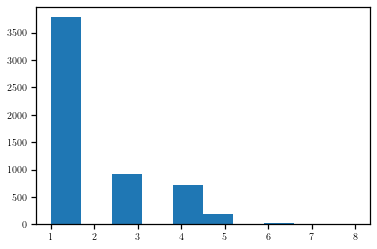

In [36]:
counts, bins = np.histogram(cyclic1e1)
plt.hist(bins[:-1], bins, weights=counts)

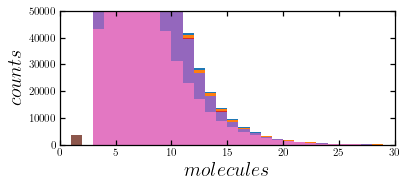

In [4]:
fig, ax = plt.subplots(1,1, sharex='col', sharey='row')
#fig, ax = plt.subplots(constrained_layout=True)
#ax[1]=plt.gca()
ax.get_yaxis().set_tick_params(which='both', direction='in')
ax.get_xaxis().set_tick_params(which='both', direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.xaxis.set_tick_params(labelsize=ticklabelsize)
ax.yaxis.set_tick_params(labelsize=ticklabelsize)

PLOTRANGE = (0,30,0,50000)
x = np.linspace(PLOTRANGE[0],PLOTRANGE[1],1)

ax.set_xlim(PLOTRANGE[0],PLOTRANGE[1])
ax.set_ylim(PLOTRANGE[2],PLOTRANGE[3])
ax.set_aspect(0.4/ax.get_data_ratio())

#countszero, binszero = np.histogram(cyclic00,bins=np.arange(50000))
counts1e06, bins1e06 = np.histogram(cyclic1e6,bins=np.arange(50000))
counts1e05, bins1e05 = np.histogram(cyclic1e5,bins=np.arange(50000))
counts1e04, bins1e04 = np.histogram(cyclic1e4,bins=np.arange(50000))
counts1e03, bins1e03 = np.histogram(cyclic1e3,bins=np.arange(50000))
counts1e02, bins1e02 = np.histogram(cyclic1e2,bins=np.arange(50000))
counts1e01, bins1e01 = np.histogram(cyclic1e1,bins=np.arange(50000))
countszero, binszero = np.histogram(cyclic00,bins=np.arange(50000))





#ax.hist(bins[:-1], bins, weights=counts,bins=100)
#n1, bins1, patches1 = ax.hist(binszero[:-1], bins=50000, weights=countszero)
n1, bins1, patches1 = ax.hist(bins1e06[:-1], bins=50000, weights=counts1e06)
n2, bins2, patches2 = ax.hist(bins1e05[:-1], bins=50000, weights=counts1e05)
n3, bins3, patches3 = ax.hist(bins1e04[:-1], bins=50000, weights=counts1e04)
n4, bins4, patches4 = ax.hist(bins1e03[:-1], bins=50000, weights=counts1e03)
n5, bins5, patches5 = ax.hist(bins1e02[:-1], bins=50000, weights=counts1e02)
n6, bins6, patches6 = ax.hist(bins1e01[:-1], bins=50000, weights=counts1e01)
n7, bins7, patches7 = ax.hist(binszero[:-1], bins=50000, weights=countszero)




#n3, bins3, patches3 = ax.hist(bins03[:-1], bins=25000, weights=counts03)
#n2, bins2, patches2 = ax.hist(bins03V_nm[:-1], bins=25000, weights=counts03V_nm)
#n3, bins3, patches3 = ax.hist(binszeroef[:-1], bins=25000, weights=countszeroef)

#plt.legend(loc='upper left',frameon=True,shadow=False,edgecolor='black',fancybox=False,framealpha=1.0,fontsize=1.0*legendlabelsize)


#plt.axvline(x=10.169, color=tableau20[0])

plt.ylabel(r'$counts$', fontsize=axislabelsize) # Y label
plt.xlabel(r'$molecules$',fontsize=axislabelsize)
#plt.savefig("bigcluster_ef-6_hbonds.pdf",bbox_inches='tight')

plt.show()

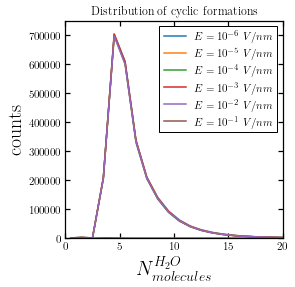

In [42]:
fig, ax = plt.subplots(1,1, sharex='col', sharey='row')

ax.get_yaxis().set_tick_params(which='both', direction='in')
ax.get_xaxis().set_tick_params(which='both', direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.xaxis.set_tick_params(labelsize=ticklabelsize)
ax.yaxis.set_tick_params(labelsize=ticklabelsize)

PLOTRANGE = (0,20,0,750000)
x = np.linspace(PLOTRANGE[0],PLOTRANGE[1],1)

ax.set_xlim(PLOTRANGE[0],PLOTRANGE[1])
ax.set_ylim(PLOTRANGE[2],PLOTRANGE[3])
ax.set_aspect(1/ax.get_data_ratio())


bins_mean1 = [0.5 * (bins1[i] + bins1[i+1]) for i in range(len(n1))]
#ax = fig.add_subplot(122)
ax.plot(bins_mean1, n1, label=r'$E=10^{-6}\;V/nm$')

bins_mean2 = [0.5 * (bins2[i] + bins2[i+1]) for i in range(len(n2))]
#ax = fig.add_subplot(122)
ax.plot(bins_mean2, n2, label=r'$E=10^{-5}\;V/nm$')

bins_mean3 = [0.5 * (bins3[i] + bins3[i+1]) for i in range(len(n3))]
#ax = fig.add_subplot(122)
ax.plot(bins_mean3, n3, label=r'$E=10^{-4}\;V/nm$')

bins_mean4 = [0.5 * (bins4[i] + bins4[i+1]) for i in range(len(n4))]
#ax = fig.add_subplot(122)
ax.plot(bins_mean4, n4, label=r'$E=10^{-3}\;V/nm$')

bins_mean5 = [0.5 * (bins5[i] + bins5[i+1]) for i in range(len(n5))]
#ax = fig.add_subplot(122)
ax.plot(bins_mean5, n5, label=r'$E=10^{-2}\;V/nm$')

bins_mean6 = [0.5 * (bins6[i] + bins6[i+1]) for i in range(len(n6))]
#ax = fig.add_subplot(122)
ax.plot(bins_mean6, n6, label=r'$E=10^{-1}\;V/nm$')

#bins_mean7 = [0.5 * (bins7[i] + bins7[i+1]) for i in range(len(n7))]
#ax = fig.add_subplot(122)
#ax.plot(bins_mean7, n7, label=r'$E=0$')

plt.legend(loc='upper right',frameon=True,shadow=False,edgecolor='black',fancybox=False,framealpha=1.0,fontsize=1.0*legendlabelsize)

plt.title(r'Distribution of cyclic formations')
plt.ylabel(r'counts', fontsize=axislabelsize) # Y label
plt.xlabel(r'$N_{molecules}^{H_{2}O}$',fontsize=axislabelsize)
plt.savefig("classofhbonds_cyclic_analysis_lines_fields_100ns_new.pdf",bbox_inches='tight')

plt.show()

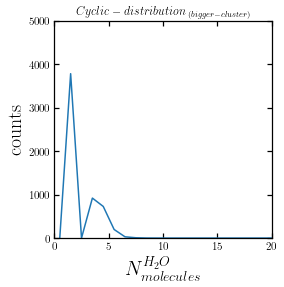

In [43]:
fig, ax = plt.subplots(1,1, sharex='col', sharey='row')

ax.get_yaxis().set_tick_params(which='both', direction='in')
ax.get_xaxis().set_tick_params(which='both', direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.xaxis.set_tick_params(labelsize=ticklabelsize)
ax.yaxis.set_tick_params(labelsize=ticklabelsize)

PLOTRANGE = (0,20,0,5000)
x = np.linspace(PLOTRANGE[0],PLOTRANGE[1],1)

ax.set_xlim(PLOTRANGE[0],PLOTRANGE[1])
ax.set_ylim(PLOTRANGE[2],PLOTRANGE[3])
ax.set_aspect(1/ax.get_data_ratio())

bins_mean6 = [0.5 * (bins6[i] + bins6[i+1]) for i in range(len(n6))]
#ax = fig.add_subplot(122)
ax.plot(bins_mean6, n6, label=r'$E=0.1$')

#plt.legend(loc='upper right',frameon=True,shadow=False,edgecolor='black',fancybox=False,framealpha=1.0,fontsize=1.0*legendlabelsize)

plt.title(r'$Cyclic-distribution_{\;(bigger-cluster)}$')
plt.ylabel(r'counts', fontsize=axislabelsize) # Y label
plt.xlabel(r'$N_{molecules}^{H_{2}O}$',fontsize=axislabelsize)
plt.savefig("classofhbonds_cyclic_analysis_lines_ef-1_100ns_new.pdf",bbox_inches='tight')

plt.show()

In [2]:
#cyclic1e1=np.loadtxt("/uni-mainz.de/homes/asourpis/Documents/gromer/PhD_roadmap/MD&electricfield/hbonds/cyclic_analysis/data_100ns/cycle_1stclass_1e-1-V_nm_new.dat")
cycliczero=np.loadtxt("/uni-mainz.de/homes/asourpis/Documents/gromer/PhD_roadmap/MD&electricfield/hbonds/cyclic_analysis/data_100ns/cycle_1stclass_zero.dat")
cyclic1e1=np.loadtxt("/uni-mainz.de/homes/asourpis/Documents/gromer/PhD_roadmap/MD&electricfield/hbonds/cyclic_analysis/data_100ns/cycle_1stclass_0.1-V_nm.dat")
cyclic1e2=np.loadtxt("/uni-mainz.de/homes/asourpis/Documents/gromer/PhD_roadmap/MD&electricfield/hbonds/cyclic_analysis/data_100ns/cycle_1stclass_0.2-V_nm.dat")
cyclic1e3=np.loadtxt("/uni-mainz.de/homes/asourpis/Documents/gromer/PhD_roadmap/MD&electricfield/hbonds/cyclic_analysis/data_100ns/cycle_1stclass_0.3-V_nm.dat")
cyclic1e4=np.loadtxt("/uni-mainz.de/homes/asourpis/Documents/gromer/PhD_roadmap/MD&electricfield/hbonds/cyclic_analysis/data_100ns/cycle_1stclass_0.4-V_nm.dat")
cyclic1e5=np.loadtxt("/uni-mainz.de/homes/asourpis/Documents/gromer/PhD_roadmap/MD&electricfield/hbonds/cyclic_analysis/data_100ns/cycle_1stclass_0.5-V_nm.dat")

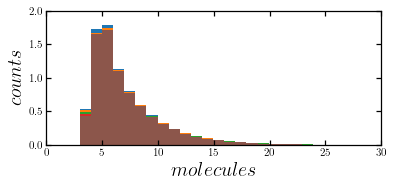

In [3]:
fig, ax = plt.subplots(1,1, sharex='col', sharey='row')
#fig, ax = plt.subplots(constrained_layout=True)
#ax[1]=plt.gca()
ax.get_yaxis().set_tick_params(which='both', direction='in')
ax.get_xaxis().set_tick_params(which='both', direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.xaxis.set_tick_params(labelsize=ticklabelsize)
ax.yaxis.set_tick_params(labelsize=ticklabelsize)

PLOTRANGE = (0,30,0,2)
x = np.linspace(PLOTRANGE[0],PLOTRANGE[1],1)

ax.set_xlim(PLOTRANGE[0],PLOTRANGE[1])
ax.set_ylim(PLOTRANGE[2],PLOTRANGE[3])
ax.set_aspect(0.4/ax.get_data_ratio())

#countszero, binszero = np.histogram(cyclic00,bins=np.arange(50000))
#counts1e06, bins1e06 = np.histogram(cyclic1e6,bins=np.arange(50000))
counts1e05, bins1e05 = np.histogram(cyclic1e5,bins=np.arange(500))
counts1e04, bins1e04 = np.histogram(cyclic1e4,bins=np.arange(500))
counts1e03, bins1e03 = np.histogram(cyclic1e3,bins=np.arange(500))
counts1e02, bins1e02 = np.histogram(cyclic1e2,bins=np.arange(500))
counts1e01, bins1e01 = np.histogram(cyclic1e1,bins=np.arange(500))
countszero, binszero = np.histogram(cycliczero,bins=np.arange(500))





#ax.hist(bins[:-1], bins, weights=counts,bins=100)
#n1, bins1, patches1 = ax.hist(binszero[:-1], bins=50000, weights=countszero)
#n1, bins1, patches1 = ax.hist(bins1e06[:-1], bins=50000, weights=counts1e06)
n1, bins1, patches1 = ax.hist(bins1e05[:-1], bins=500, weights=counts1e05/100000)
n2, bins2, patches2 = ax.hist(bins1e04[:-1], bins=500, weights=counts1e04/100000)
n3, bins3, patches3 = ax.hist(bins1e03[:-1], bins=500, weights=counts1e03/100000)
n4, bins4, patches4 = ax.hist(bins1e02[:-1], bins=500, weights=counts1e02/100000)
n5, bins5, patches5 = ax.hist(bins1e01[:-1], bins=500, weights=counts1e01/100000)
n6, bins6, patches6 = ax.hist(binszero[:-1], bins=500, weights=countszero/100000)




#n3, bins3, patches3 = ax.hist(bins03[:-1], bins=25000, weights=counts03)
#n2, bins2, patches2 = ax.hist(bins03V_nm[:-1], bins=25000, weights=counts03V_nm)
#n3, bins3, patches3 = ax.hist(binszeroef[:-1], bins=25000, weights=countszeroef)

#plt.legend(loc='upper left',frameon=True,shadow=False,edgecolor='black',fancybox=False,framealpha=1.0,fontsize=1.0*legendlabelsize)


#plt.axvline(x=10.169, color=tableau20[0])

plt.ylabel(r'$counts$', fontsize=axislabelsize) # Y label
plt.xlabel(r'$molecules$',fontsize=axislabelsize)
#plt.savefig("bigcluster_ef-6_hbonds.pdf",bbox_inches='tight')

plt.show()

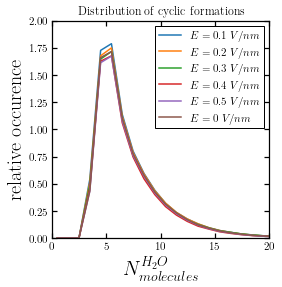

In [9]:
fig, ax = plt.subplots(1,1, sharex='col', sharey='row')

ax.get_yaxis().set_tick_params(which='both', direction='in')
ax.get_xaxis().set_tick_params(which='both', direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.xaxis.set_tick_params(labelsize=ticklabelsize)
ax.yaxis.set_tick_params(labelsize=ticklabelsize)

PLOTRANGE = (0,20,0,2)
x = np.linspace(PLOTRANGE[0],PLOTRANGE[1],1)

ax.set_xlim(PLOTRANGE[0],PLOTRANGE[1])
ax.set_ylim(PLOTRANGE[2],PLOTRANGE[3])
ax.set_aspect(1/ax.get_data_ratio())


bins_mean1 = [0.5 * (bins1[i] + bins1[i+1]) for i in range(len(n1))]
#ax = fig.add_subplot(122)
ax.plot(bins_mean1, n1, label=r'$E=0.1\;V/nm$')

bins_mean2 = [0.5 * (bins2[i] + bins2[i+1]) for i in range(len(n2))]
#ax = fig.add_subplot(122)
ax.plot(bins_mean2, n2, label=r'$E=0.2\;V/nm$')

bins_mean3 = [0.5 * (bins3[i] + bins3[i+1]) for i in range(len(n3))]
#ax = fig.add_subplot(122)
ax.plot(bins_mean3, n3, label=r'$E=0.3\;V/nm$')

bins_mean4 = [0.5 * (bins4[i] + bins4[i+1]) for i in range(len(n4))]
#ax = fig.add_subplot(122)
ax.plot(bins_mean4, n4, label=r'$E=0.4\;V/nm$')

bins_mean5 = [0.5 * (bins5[i] + bins5[i+1]) for i in range(len(n5))]
#ax = fig.add_subplot(122)
ax.plot(bins_mean5, n5, label=r'$E=0.5\;V/nm$')

bins_mean6 = [0.5 * (bins6[i] + bins6[i+1]) for i in range(len(n6))]
#ax = fig.add_subplot(122)
ax.plot(bins_mean6, n6, label=r'$E=0\;V/nm$')

#bins_mean7 = [0.5 * (bins7[i] + bins7[i+1]) for i in range(len(n7))]
#ax = fig.add_subplot(122)
#ax.plot(bins_mean7, n7, label=r'$E=0$')

plt.legend(loc='upper right',frameon=True,shadow=False,edgecolor='black',fancybox=False,framealpha=1.0,fontsize=1.0*legendlabelsize)

plt.title(r'Distribution of cyclic formations')
plt.ylabel(r'relative occurence', fontsize=axislabelsize) # Y label
plt.xlabel(r'$N_{molecules}^{H_{2}O}$',fontsize=axislabelsize)
#plt.savefig("classofhbonds_cyclic_analysis_lines_fields0.5Vnm_100ns_new_norm100000.pdf",bbox_inches='tight')
plt.savefig("classofhbonds_cyclic_analysis_lines_fields0.5Vnm_100ns_new_norm100000_pngversion.png",dpi=600,bbox_inches='tight')

plt.show()

In [14]:
np.sum(n5) #the ensembele in this case is not normalized 
#since each time frame we collect a (4,5,6) whichci are not equally weighted
#next I got the (4,3,5,10,9) etc...

7.66627

In [15]:
np.sum(n1)

8.249600000000001

In [16]:
np.sum(n6)

7.849520000000001

In [ ]:
/uni-mainz.de/homes/asourpis/Documents/gromer/PhD_roadmap/MD\&electricfield/hbonds/cyclic_analysis/data_100ns